# Pytorch workflow

Let's explore an example pytorch end-to-end workflow.

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3 : "fitting the mode to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model", 
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the mode to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn # contains all pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__


'2.5.1'

## 1. Data (preparing and loading)

Data can be almost anything .... in machine leanring.

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio like songs or podcatsts
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

We'll use a linear regression formula to make a straight line with knwon **parameters**.

In [5]:
# create known parameters
weight = 0.7 
bias = 0.3

# create 

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [6]:
len(X), len(y)

(50, 50)

### Splitting data into training and testing sets (one of the most important concepts)

Let's create a training and test set with our data.

In [9]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

Visualize, visualize, visualize!

In [12]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels= y_test, predictions = None):
    plt.figure(figsize=(10,7))

    # Plot training data in blue

    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

    # Plot test data in green

    plt.scatter(test_data, test_labels, c = "g", s=4, label = "Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", s=4, label = "Predictions")

    plt.legend(prop = {"size":14});


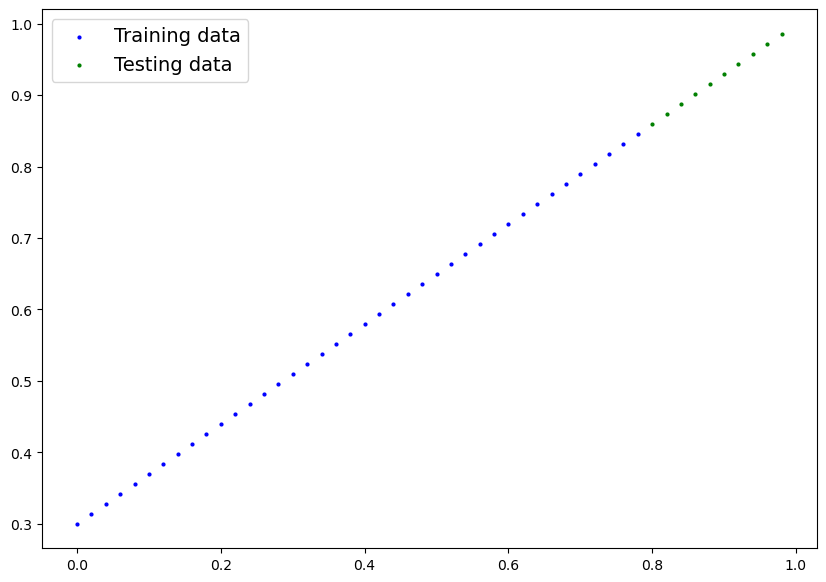

In [13]:
plot_predictions()

## 2. Build model

Our first PyTorch model!!

This is very exiting... Let's do it

We need a class for the future of our coding excersices, so you need to refresh your breain about python class.

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent the ideal values

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [14]:
# Create a Linear regression model class
from torch import nn
class LinearRegression (nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # forward method to define the computation in the model
    def forward(self,x: torch.Tensor ) -> torch.Tensor:
        return self.weights * x + self.bias


### PyTorch model building essentials

* torch.nn  - contains all of hte buildings for computational graphs (another word for nural networks)
* torch.nn.Paramyer - what oaranters should our mdodel try and learn, often a Pytorhc layer from torch.nn will set these for us
* torch.nn.Module - The base class for all nueral modeules, if you subclass it, you should overwrite the forward method.
* torch.optim - this where the optimizers in pyorch live, they will help with gradient descent
* def forward() - all nn.Module subclasses can be overwritte since every code is different than other

### Checking the contens of our pyorch model

Now we've created a model, now we need to see what's inside this model?

So we can check our model paramaters or what's inside our model using `.paramters()`

In [22]:
torch.manual_seed(42)
torch.rand(1)

tensor([0.8823])

In [65]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model 
model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [66]:
# List named paramters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [67]:
weight, bias # we need to reach to these values from our model

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, ;et's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [68]:
with torch.inference_mode(): # why do this? it removes the gradient thing because it will perform faster as it does not track those gradients as supposed to doing this by itself without the function
    y_preds = model_0(X_test)

# You can also do something similar like torch.no_grade but torch.inference_mode() since it is more popular
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode here -> 

In [69]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

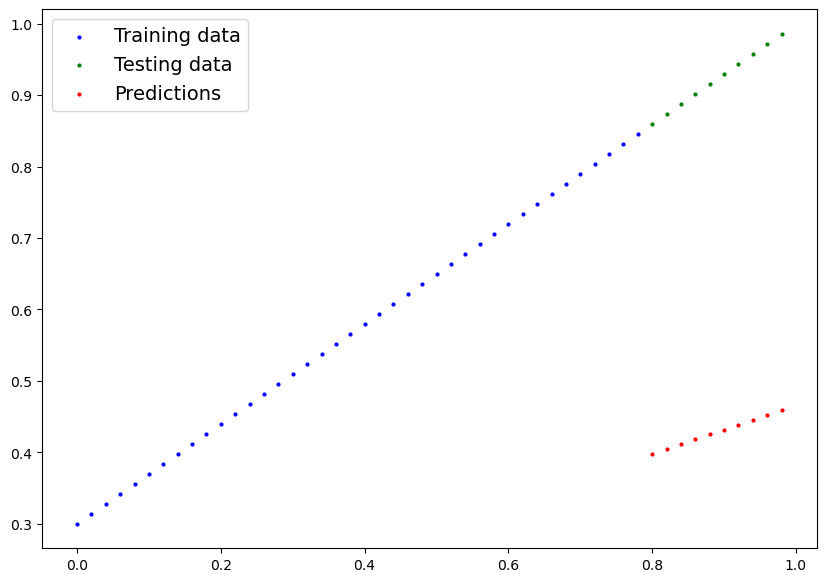

In [70]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move some *unknown* paramters  to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss fucntion may also be called a cosgt function or criterion in diffferent areas.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizeer:** Takes into accoutn the loss of a model and adjusts hte model's paramters (e.g. weights and bias) to improve the loss function.

And specifically for pytorchm we need:

* A training loop
* A testing loop



In [71]:
# Check out our model's paramters (a paramter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [72]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate which is possibly th emsot important hyperparamter we set ourself
# learning rate: 1, means we change 1 to 2. 0.1 means we change 1 to 1.1



### Building a training loop in PyTorch and a testing loop

A couple of things we need in a trianing loop:
0. Loop through the data.
1. Forward pass (this involves the data moving through our model's `forward()` functions and also called forward propagation)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the  loss
5. Optimizer step - use the optimizer to adjus our model's paramters to try and improve the loss function

In [74]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparamter because we set it ourself)
epochs = 1000

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
    # set th emodel to training mode
    model_0.train() # train mode in pytorch sets all paranters that require gradients to require gradients

    # 1. Forward pass
    y_preds = model_0(X_train) # train our model with our training model

    # 2. calculate the loss
    loss = loss_fn(y_preds, y_train) # prediction, actual labels or target
    # print(f"Loss: {loss}")
    # 3. Optimizer zero grad
    optimizer.zero_grad() # we need to zero the optimizer before we start using them

    # 4. Perform backpropagation on the loss with respect tro the paramtrs of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizdr changes will accumulate thorugh the loop so... w e have to zero them above in step 3
    # this updates our model's paramters

    model_0.eval() # turns off gradient tracking and different settings in the model not needed for evaluation/testing
    with torch.inference_mode(): # turns off gradient tracking and a couple of more things behind the scences. Not necessarily need this but this just makes our code much faster than before
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    
    
    if epoch % 100 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Test: {loss} | test loss: {test_loss}")



print(f"Loss: {loss}")


Epoch: 0 | Test: 0.3013603389263153 | test loss: 0.4675942063331604
Epoch: 100 | Test: 0.024110015481710434 | test loss: 0.05536102131009102
Epoch: 200 | Test: 0.0025885060895234346 | test loss: 0.008447891101241112
Epoch: 300 | Test: 0.0025885060895234346 | test loss: 0.008447891101241112
Epoch: 400 | Test: 0.0025885060895234346 | test loss: 0.008447891101241112
Epoch: 500 | Test: 0.0025885060895234346 | test loss: 0.008447891101241112
Epoch: 600 | Test: 0.0025885060895234346 | test loss: 0.008447891101241112
Epoch: 700 | Test: 0.0025885060895234346 | test loss: 0.008447891101241112
Epoch: 800 | Test: 0.0025885060895234346 | test loss: 0.008447891101241112
Epoch: 900 | Test: 0.0025885060895234346 | test loss: 0.008447891101241112
Loss: 0.00893248151987791


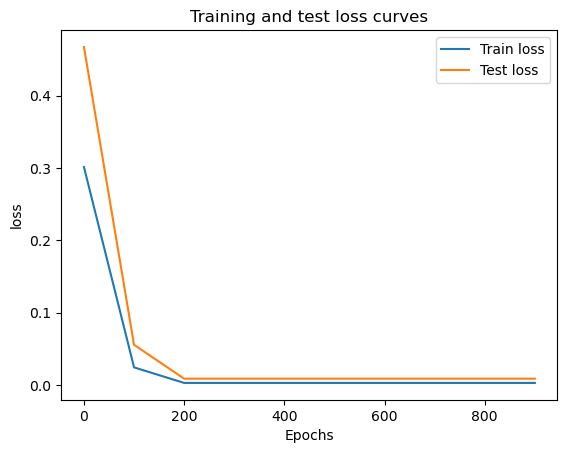

In [83]:
# plot the loss curves
import numpy as np


plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend();


In [75]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)


In [76]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [77]:
weight, bias

(0.7, 0.3)

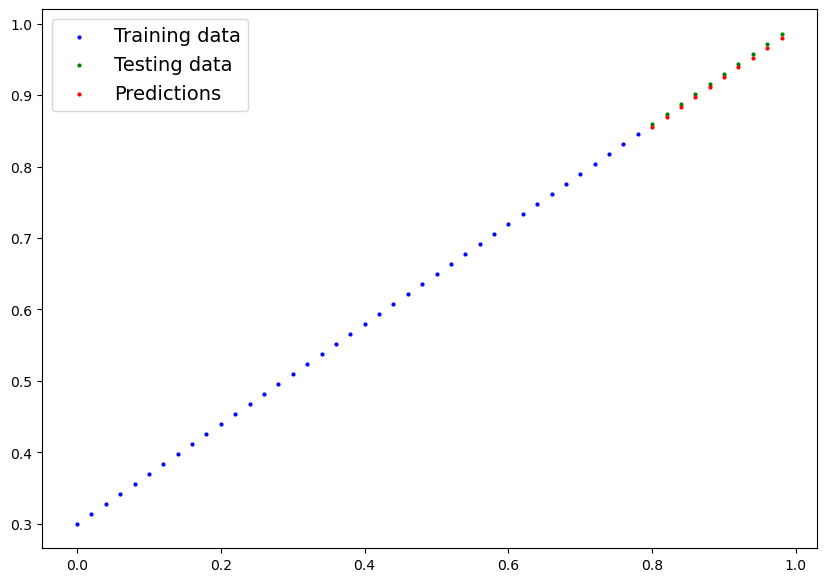

In [78]:
plot_predictions(predictions=y_preds_new)

## Saving a model in pytorch

There are three main methods you should learn about for saving and loading models in pytorch.

1. `torch.save()` - allows you to save a pytorch object in python's pickle format.
2. `torch.load()` - allows you to load a saved  pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [86]:
# Saving our PyTorch model
from pathlib import Path 

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2/ Create a model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth" # pytorch has an extension file called .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [87]:
!ls -l models

total 8
-rw-r--r--  1 abdullah  staff  1680 Dec  2 15:04 01_pytorch_workflow_model_0.pth


## Loading a pytorch model

Since we saved our model's `state_dict()` rathern than our entire model , we'll create a new instnance of our model class and load the saved `state_dict()` into that.

In [88]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [91]:
# To load in a saved state_dict we have to instatiante a new instance of our model class
loaded_model_0 = LinearRegression()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/var/folders/2p/d_nj_y2s0p32_2p156bn343c0000gn/T/ipykernel_87129/3489063496.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=M

<All keys matched successfully>

In [92]:
loaded_model_0.state_dict() # works exactly as you can see here

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [94]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [96]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [97]:
y_preds == loaded_model_preds # horray it worked

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back tohrough the steps above and see it all in one place

In [98]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
#Checkl pytorch version
torch.__version__

'2.5.1'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it.

If not GPU is availablem the code will default to using CPU.

In [99]:
# Setup device agnostic code
device = "cude" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [100]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


## 6.1 Data

In [101]:
# Create some data using the linear regression formula of y = weight * X + bias

weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [102]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

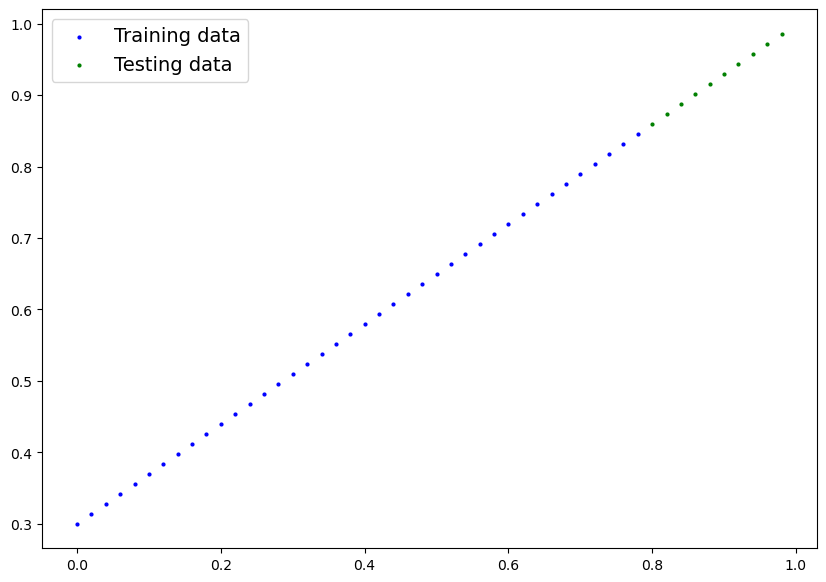

In [103]:
# Plot the data
# Note: if you do not have the plot_prediciton() funciton loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch linear model

In [105]:
# Create a linear model by subclassing nn.Module 
class LinearRegressionModelV2(nn.Module): # different than the one that we created
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model paramters 
        self.linear_layer = nn.Linear(in_features=1, out_features=1) #input of size 1 and output of size 1
        # one output of x is one output of y 
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.linear_layer(x)
    
# set the manual seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [106]:
# Set the model to use the target device
next(model_1.parameters()).device

device(type='cpu')

In [107]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device # this should work with the gpu 

device(type='cpu')

## 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [109]:
# Setup loss function

loss_fn = nn.L1Loss()

# setup our optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

# Let's write a trianing loop
torch.manual_seed(42)

epochs = 200

# put data on target device 
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. perform backpropagation
    loss.backward() # we went forward, then now we go backwards

    #5. optimizer step
    optimizer.step() # we look at forward and backward, then calculate optimizer

    ### testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss : {test_loss}")


Epoch: 0 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 10 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 20 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 30 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 40 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 50 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 60 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 70 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 80 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 90 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 100 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 110 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 120 | Loss: 0.0012645028764382005 | Test loss : 0.013801807537674904
Epoch: 130 | Loss: 0.00

In [110]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [111]:
weight,bias # in practise, you do not know the ideal paramters 

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [112]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

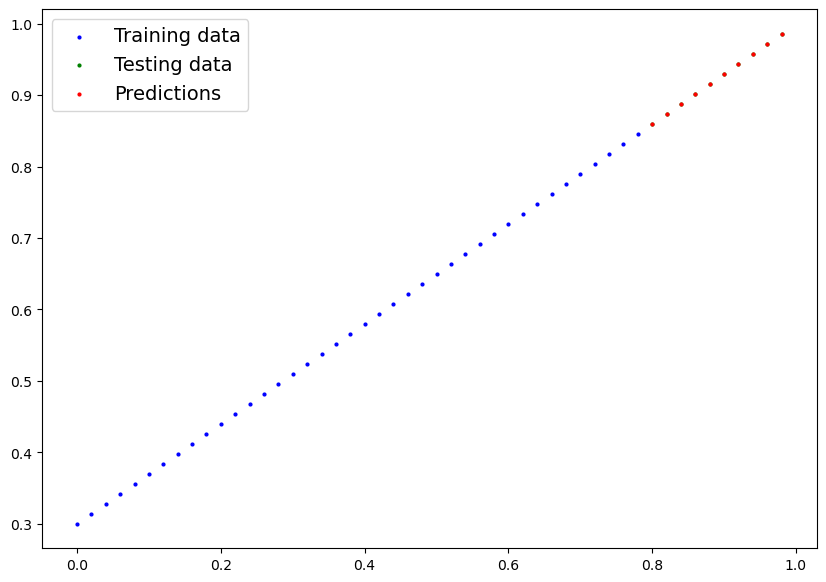

In [114]:
# Checkout our model predictions visually
plot_predictions(predictions=y_preds) # if your thing is on the gpu then you will get an error

### 6.5 Saving and loading a trained model

In [118]:
from pathlib import Path

# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVED_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dicvt
torch.save(obj=model_1.state_dict(), f=MODEL_SAVED_PATH)

In [119]:
# Load a PyTorch model

# Create a new instnac eof linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVED_PATH))

# Put the loaded model to device
loaded_model_1.to(device)



/var/folders/2p/d_nj_y2s0p32_2p156bn343c0000gn/T/ipykernel_87129/1519140741.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MOD

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [120]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [121]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [122]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_1_preds = loaded_model_1(X_test)
y_preds == loaded_1_preds #hurray

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Excercises and extra curriculum

For excercises and more practise, refer to the following link (found at github): 

